# Nonlinear Benchmarks

In [1]:
from matplotlib import cm
import matplotlib.pyplot as plt
from pyomo.environ import *
from math import *
import numpy as np

## Rosenbrock Function: Unconstrained

Please recompile / update your pynumero_ASL library.

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.13.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        3

Total number of variables............................:        2
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables w

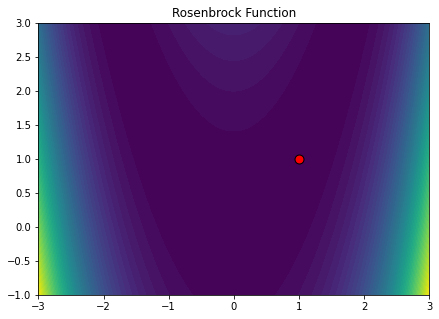

In [2]:
model = ConcreteModel()
model.x = Var(initialize=1.5)
model.y = Var(initialize=1.5)

def rosenbrock(m):
    return (1.0-m.x)**2 + 100.0*(m.y - m.x**2)**2

model.obj = Objective(rule=rosenbrock, sense=minimize)
res = SolverFactory('cyipopt').solve(model, tee=True)
model.pprint()

# For plotting the result
class struct:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
X, Y = np.meshgrid(np.linspace(-3,3,200), np.linspace(-1,3,200))
Z = np.zeros(X.shape)

for i in range(len(X)):
    for j in range(len(Y)):
        m = struct(X[i,j], Y[i,j])
        Z[i,j] = rosenbrock(m) 

fig = plt.figure(figsize=(7,5))
plt.contourf(X, Y, Z, 50)
plt.scatter(model.x.value, model.y.value, 
            c='r', s=80, edgecolor='k')
plt.title('Rosenbrock Function')
plt.show()

## Himmelblau Function: Unconstrained

This is Ipopt version 3.13.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        3

Total number of variables............................:        2
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  

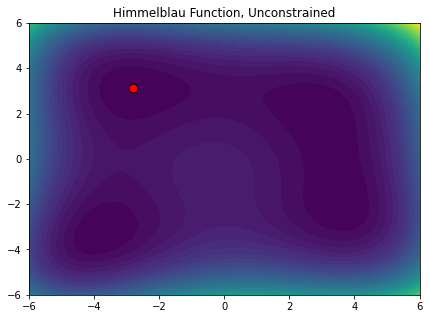

In [3]:
model = ConcreteModel()
model.x = Var(initialize=-2.0)
model.y = Var(initialize=2.0)

def himmelblau(m):
    return (m.x**2 + m.y - 11)**2 + (m.x + m.y**2 - 7)**2

model.obj = Objective(rule=himmelblau, sense=minimize)
res = SolverFactory('cyipopt').solve(model, tee=True)
model.pprint()

# For plotting the result       
X, Y = np.meshgrid(np.linspace(-6,6,200), np.linspace(-6,6,200))
Z = np.zeros(X.shape)

for i in range(len(X)):
    for j in range(len(Y)):
        m = struct(X[i,j], Y[i,j])
        Z[i,j] = himmelblau(m) 

fig = plt.figure(figsize=(7,5))
plt.contourf(X, Y, Z, 50)
plt.scatter(model.x.value, model.y.value, 
            c='r', s=80, edgecolor='k')
plt.title('Himmelblau Function, Unconstrained')
plt.show()

## Himmelblau Function: Constrained

This is Ipopt version 3.13.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        2
Number of nonzeros in Lagrangian Hessian.............:        3

Total number of variables............................:        2
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        1
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        1

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  

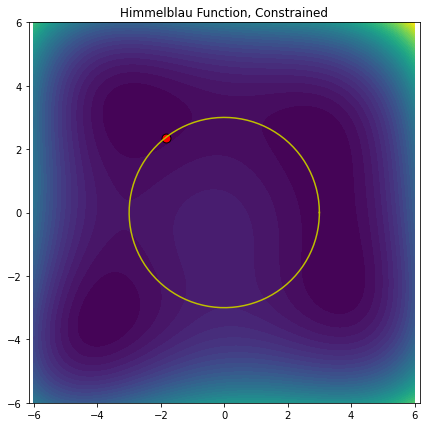

In [4]:
model = ConcreteModel()
model.x = Var(initialize=-2.0)
model.y = Var(initialize=2.0)
R = 3

def himmelblau(m):
    return (m.x**2 + m.y - 11)**2 + (m.x + m.y**2 - 7)**2

model.obj = Objective(rule=himmelblau, sense=minimize)
model.con = Constraint(expr=model.x**2 + model.y**2 <= R*R)
res = SolverFactory('cyipopt').solve(model, tee=True)
model.pprint()

# For plotting the result       
X, Y = np.meshgrid(np.linspace(-6,6,200), np.linspace(-6,6,200))
th = np.linspace(0,2*pi,200)
Z = np.zeros(X.shape)

for i in range(len(X)):
    for j in range(len(Y)):
        m = struct(X[i,j], Y[i,j])
        Z[i,j] = himmelblau(m) 

fig = plt.figure(figsize=(7,7))
plt.contourf(X, Y, Z, 50)
plt.scatter(model.x.value, model.y.value, 
            c='r', s=80, edgecolor='k')
plt.plot(R*np.cos(th), R*np.sin(th), c='y')
plt.title('Himmelblau Function, Constrained')
plt.axis('equal')
plt.show()